___

<a href='http://www.dourthe.tech'> <img src='Dourthe_Technologies_Headers.png' /></a>
___
<center><em>For more information, visit <a href='http://www.dourthe.tech'>www.dourthe.tech</a></em></center>

# Ocean Water Temperature using Linear Regression

___ 
## Objective
Train a Linear Regression model to predict the ocean water temperature based on different metrics from the California Cooperative Oceanic Fisheries Investigations (CalCOFI) Database.

 ___
## Dataset
The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

The complete CalCOFI Hydrographic Database, as well as a detailed description of each reported metric can be found directly on their website: https://calcofi.org/ccdata/database.html

For simplicity, a reduced version of the original Database focusing on the 'Reported' metrics was created.

The corresponding CSV file named _bottle\_reduced.csv_ contains the following columns:

| Name | Description | Data Type | 
|:---|:---|:---|
|Depth | Reported Depth in Meters | _integer_ |
|Pressure | Pressure in decibars | _integer_ |
|Temperature | Reported Temperature in Degrees Celcius | _float_ |
|Salinity | Reported Salinity based on Practical Salinity Scale 1978 UNESCO 1981a | _float_ |
|Density | Reported Potential Density of water | _float_ |
|SVA | Reported Specific Volume Anomaly | _float_ |
|DynHeight | Reported Dynamic Height in Dynamic Meters | _float_ |
|Oxygen | Reported milliliters of oxygen per Liter of seawater | _float_ |
|OxygenSat | Reported Oxygen Saturation in Percent | _float_ |
|Silicate | Reported Silicate Concentration in micro Mole per Liter | _float_ |
|Phosphate | Reported Phosphate Concentration in micro Mole per Liter | _float_ |
|Nitrate | Reported Nitrate Concentration in micro Mole per Liter | _float_ |
|Nitrite | Reported Nitrite Concentration in micro Mole per Liter | _float_ |
|Ammonium | Reported Ammonium Concentration in micro Mole per Liter | _float_ |
|Chlorophyll | Reported Chlorophyll-a content in micrograms per Liter | _float_ |
|Phaeophytin | Reported Phaeophytin content in micrograms per Liter | _float_ |

A text file containing the details in the table above was also created: _bottle\_reduced\_description.txt_

___
## Libraries Imports
### Data manipulation and analysis

In [111]:
import pandas as pd
import numpy as np

### Data visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Machine learning

In [33]:
# Split data between training and test set
from sklearn.model_selection import train_test_split

# Linear regression model
from sklearn.linear_model import LinearRegression

# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

___
## Data Import

In [38]:
df = pd.read_csv('bottle_reduced.csv')
df_desc = pd.read_csv('bottle_reduced_description.txt')

___
## Exploratory Data Analysis
### General

**We will first create a function that takes the name of a column as input and prints out its description based on the _bottle\_reduced\_description.txt_ document.**

In [48]:
def column_info(column):
    print('Column name:\t', column, '\nDescription:\t', df_desc[df_desc['Column name']==column]['Description'].values[0])

From now on, if we need to check the description of a column, we can use this function:

In [49]:
df.columns

Index(['Depth', 'Pressure', 'Temperature', 'Salinity', 'Density', 'SVA',
       'DynHeight', 'Oxygen', 'OxygenSat', 'Silicate', 'Phosphate', 'Nitrate',
       'Nitrite', 'Ammonium', 'Chlorophyll', 'Phaeophytin'],
      dtype='object')

In [55]:
column_info('Nitrite')

Column name:	 Nitrite 
Description:	 Reported Nitrite Concentration in micro Mole per Liter


**Check the statistics of each column to have a better sense of the scale of each metric.**

In [57]:
df.describe()

Depth       Pressure    Temperature       Salinity  \
count  864863.000000  864863.000000  853900.000000  817509.000000   
mean      226.832495     228.395694      10.799697      33.840295   
std       316.050007     319.456731       4.243829       0.462978   
min         0.000000       0.000000       1.440000       4.570000   
25%        46.000000      46.000000       7.680000      33.488000   
50%       125.000000     126.000000      10.060000      33.863000   
75%       300.000000     302.000000      13.880000      34.196000   
max      5351.000000    5458.000000      31.140000      37.034000   

             Density            SVA      DynHeight         Oxygen  \
count  812007.000000  812092.000000  818206.000000  696201.000000   
mean       25.811010     220.938918       0.431763       3.392498   
std         1.124645      93.483703       0.382336       2.073271   
min        20.934000       0.400000       0.000000      -0.010000   
25%        24.960000     143.700000       0.130000       1.360000   
50%        25.990000     203.200000       0.340000       3.440000   
75%        26.640000     299.800000       0.640000       5.500000   
max       250.784000     683.400000       3.880000      11.130000   

           OxygenSat       Silicate      Phosphate        Nitrate  \
count  666448.000000  354099.000000  413325.000000  337411.000000   
mean       57.192940      26.606862       1.564736      17.302188   
std        37.060537      27.648403       1.035973      14.581998   
min        -0.100000       0.000000       0.000000      -0.400000   
25%        21.200000       3.100000       0.470000       0.600000   
50%        54.500000      18.000000       1.570000      18.100000   
75%        97.600000      41.500000       2.480000      30.000000   
max       214.100000     196.000000       5.210000      95.000000   

             Nitrite      Ammonium    Chlorophyll    Phaeophytin  
count  337584.000000  64982.000000  225276.000000  225275.000000  
mean        0.042336      0.084851       0.450225       0.198599  
std         0.104201      0.273022       1.208566       0.376539  
min         0.000000      0.000000      -0.010000      -3.890000  
25%         0.000000      0.000000       0.050000       0.050000  
50%         0.010000      0.000000       0.160000       0.110000  
75%         0.030000      0.060000       0.390000       0.230000  
max         8.190000     15.630000      66.110000      65.300000

**Display the first few rows of the dataset.**

In [58]:
df.head()

Depth  Pressure  Temperature  Salinity  Density    SVA  DynHeight  Oxygen  \
0      0         0        10.50    33.440    25.64  233.0       0.00     NaN   
1      8         8        10.46    33.440    25.65  232.5       0.01     NaN   
2     10        10        10.46    33.437    25.65  232.8       0.02     NaN   
3     19        19        10.45    33.420    25.64  234.1       0.04     NaN   
4     20        20        10.45    33.421    25.64  234.0       0.04     NaN   

   OxygenSat  Silicate  Phosphate  Nitrate  Nitrite  Ammonium  Chlorophyll  \
0        NaN       NaN        NaN      NaN      NaN       NaN          NaN   
1        NaN       NaN        NaN      NaN      NaN       NaN          NaN   
2        NaN       NaN        NaN      NaN      NaN       NaN          NaN   
3        NaN       NaN        NaN      NaN      NaN       NaN          NaN   
4        NaN       NaN        NaN      NaN      NaN       NaN          NaN   

   Phaeophytin  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

### Missing data
**Check for missing data (expressed as a percentage of the dataset length).**

In [60]:
df.isnull().sum()*100/len(df)

Depth           0.000000
Pressure        0.000000
Temperature     1.267600
Salinity        5.475318
Density         6.111488
SVA             6.101660
DynHeight       5.394727
Oxygen         19.501586
OxygenSat      22.941784
Silicate       59.057215
Phosphate      52.209194
Nitrate        60.986769
Nitrite        60.966766
Ammonium       92.486440
Chlorophyll    73.952406
Phaeophytin    73.952522
dtype: float64

**Most metrics seem to have a lot of missing observations.**

Let's drop all columns that have more than 10% of missing data:

In [62]:
df = df.loc[:,df.isnull().sum()*100/len(df) < 10]

In [65]:
df.isnull().sum()*100/len(df)

Depth          0.000000
Pressure       0.000000
Temperature    1.267600
Salinity       5.475318
Density        6.111488
SVA            6.101660
DynHeight      5.394727
dtype: float64

**We can now remove all rows that have missing observations for one of the remaining metrics.**

In [66]:
pre_drop_na_len = len(df)

In [68]:
df = df.dropna()

In [72]:
print('Percentage of dropped data:\t', np.round(100-len(df)*100/pre_drop_na_len,2), ' %')

Percentage of dropped data:	 6.68  %


### Correlations
**Let's look at the correlation matrix.**

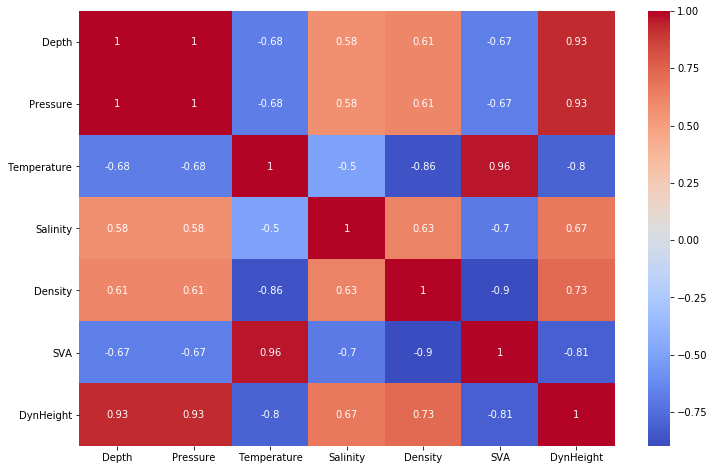

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

**Now, let's calculate and plot the correlations only for the water temperature column.**

In [74]:
temp_cor = df.corr()['Temperature'].sort_values()[:-1]
print(temp_cor)

Density     -0.861314
DynHeight   -0.799284
Depth       -0.681038
Pressure    -0.679714
Salinity    -0.503253
SVA          0.964033
Name: Temperature, dtype: float64


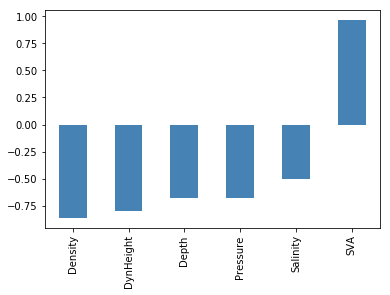

In [80]:
temp_cor.plot(kind='bar', color='steelblue')
plt.show()

It seems like the SVA column has the highest correlation with water temperature.

**We can also use the pairplot command from the seaborn library to have an overall view of the data distribution and see which metrics seem to have a linear relationship.**

Warning: because of the large amount of data, this command can take a while to compute.

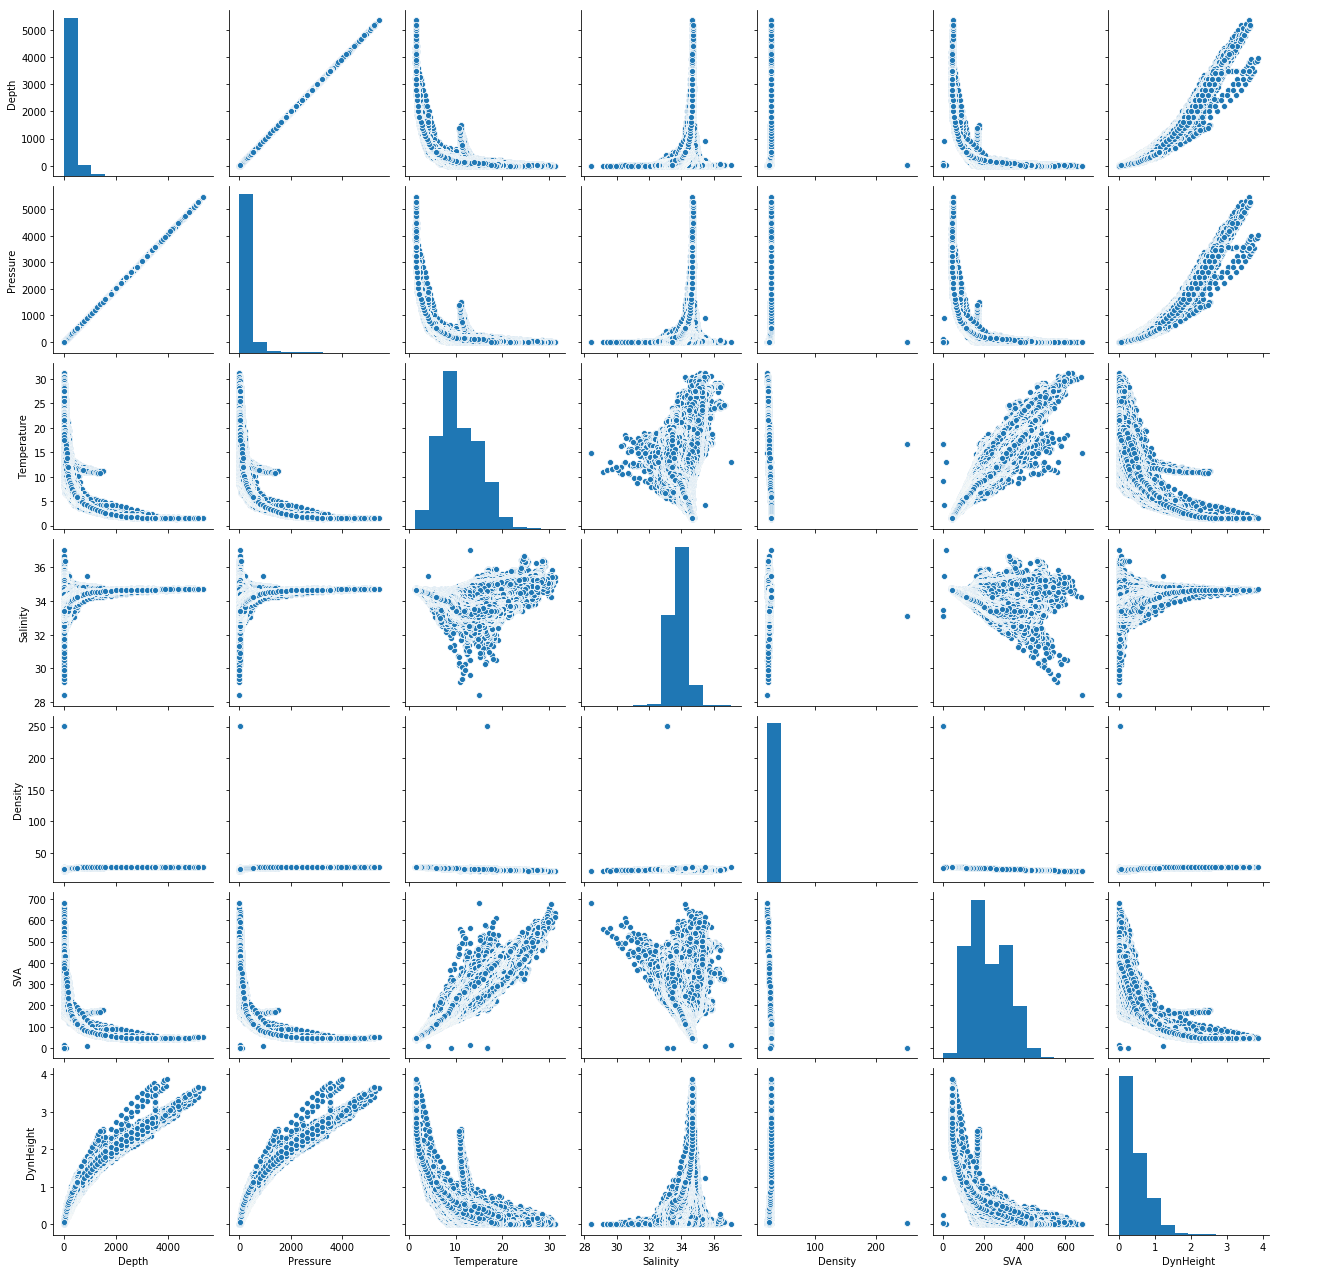

In [81]:
sns.pairplot(df)
plt.show()

These plots clearly show some expected relationships, such as a perfect linear correlation between Depth and Pressure.

It also confirms that water temperature and SVA seem to be linearly correlated.

**Let's check the description of the SVA column:**

In [82]:
column_info('SVA')

Column name:	 SVA 
Description:	 Reported Specific Volume Anomaly


If we look for a more detailed description on Google, the Specific Volume Anomaly seem to be a function of absolute water salinity, conservative temperature and pressure.

**We can try to visualize the potential relationship between water temperature and SVA using a hexagonal plot, which better shows the data distribution compared to a simple scatter plot.**

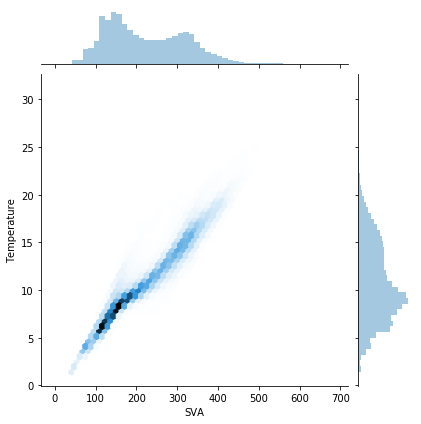

In [87]:
sns.jointplot('SVA', 'Temperature', data=df, kind='hex')
plt.show()

**CONCLUSION**

The water temperature seem to be linearly correlated to the SVA column.

___
## Machine Learning
### Input/Output definition

**We will try to build a linear regression model based on the SVA column.**

In [135]:
X = df[['SVA']]
y = df[['Temperature']]

**Split the data into training and test sets:**

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Define and fit model to training data

In [137]:
lm = LinearRegression()

In [138]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**We can print the model's coefficients:**

In [139]:
print(lm.coef_)

[[0.04350382]]


### Model evaluation

**Generate predictions:**

In [140]:
predictions = lm.predict(X_test)

**We can now plot the real value against the predicted ones:**

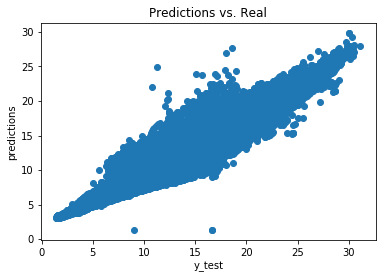

In [141]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Predictions vs. Real')
plt.show()

**We can now calculate the mean absolute and mean squared errors.**

In [142]:
print('MAE:\t', np.round(mean_absolute_error(y_test, predictions),2), '\tDegC')
print('MSE:\t', np.round(mean_squared_error(y_test, predictions),2), '\tDegC squared')

MAE:	 0.75 	DegC
MSE:	 1.25 	DegC squared


**In this context, the mean squared error is probably the best representation of the error, as it will increase the penalty on outliers by squaring the corresponding error.**

Considering that squared degrees are not very intuitive to interpret, let's calculate the root mean squared error:

In [143]:
print('RMSE:\t', np.round(np.sqrt(mean_squared_error(y_test, predictions)),2), '\tDegC')

RMSE:	 1.12 	DegC


**To better understand whether a 1.12 DegC difference is significant or not, let's compare it to the water temperature statistics:**

In [144]:
df['Temperature'].describe()

count    807121.000000
mean         10.881504
std           4.214839
min           1.440000
25%           7.780000
50%          10.130000
75%          13.940000
max          31.140000
Name: Temperature, dtype: float64

The RMSE is lower than the standard deviations, but is still around 10% of the mean.

**For more details on the fit of the model, we can look at the residuals and check whether they look normally distributed.**

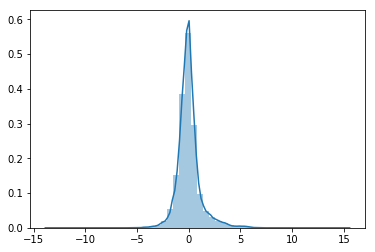

In [146]:
sns.distplot(np.array(y_test-predictions), bins=50)
plt.show()

**CONCLUSION**

The linear regression model using the SVA column showed a fairly descent fit to the data, with normally distributed residuals.

Considering that SVA is a function of salinity and pressure, this indicates that these two metrics may also be linked to the overall water temperature.

### Model enhancement: Multivariate linear regression

**To try and improve the performance of the model, let's build a second model using all metrics.**

In [147]:
df.columns

Index(['Depth', 'Pressure', 'Temperature', 'Salinity', 'Density', 'SVA',
       'DynHeight'],
      dtype='object')

**Define input/output data:**

In [148]:
X = df[['Depth', 'Pressure', 'Salinity', 'Density', 'SVA', 'DynHeight']]
y = df[['Temperature']]

**Split the data into training and test sets:**

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Define and fit model:**

In [150]:
lm = LinearRegression()

In [151]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print model coefficients:**

In [152]:
coeff_df = pd.DataFrame(lm.coef_.transpose(),index=X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Depth        -0.178545
Pressure      0.174792
Salinity      3.333018
Density       0.084330
SVA           0.050181
DynHeight    -0.215885

**Calculate predictions and plot against real data:**

In [153]:
predictions = lm.predict(X_test)

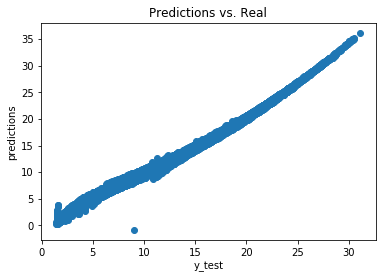

In [154]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Predictions vs. Real')
plt.show()

**Evaluate model:**

In [130]:
print('MAE:\t', np.round(mean_absolute_error(y_test, predictions),2), '\tDegC')
print('MSE:\t', np.round(mean_squared_error(y_test, predictions),2), '\tDegC squared')
print('RMSE:\t', np.round(np.sqrt(mean_squared_error(y_test, predictions)),2), '\tDegC')

MAE:	 0.21 	DegC
MSE:	 0.1 	DegC squared
RMSE:	 0.31 	DegC


**Plot residuals:**

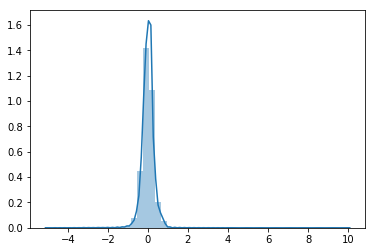

In [156]:
sns.distplot(np.array(y_test-predictions), bins=50)
plt.show()

___
## Conclusion

The model was significantly improved after using all features, with an RMSE of 0.31 DegC compared to the 1.12 DegC obtained when only using the SVA column. This model could be used to predict ocean water temperature from water properties such as salinity, density and pressure. This also shows the potential impact of change in water properties on water temperature, which can be a valuable information when studying climate change and sea level rise.

**This pipeline could easily be transferred to other linear regression problems.**